In [3]:
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz


def cm2inch(value):
    return value / 2.54


# axes.xaxis.set_tick_params(direction='in', which='both')
# axes.yaxis.set_tick_params(direction='in', which='both')


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 200
from matplotlib import rc

rc("font", family="serif")
rc("text", usetex=True)
rc("xtick", labelsize="medium")
rc("ytick", labelsize="medium")
rc("axes", labelsize="large")


def cm2inch(value):
    return value / 2.54


def cm2inch(value):
    return value / 2.54


def gauss_function(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2))


def pdf(data, bins=10, density=True):

    pdf, bins_edge = np.histogram(data, bins=bins, density=density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2

    return pdf, bins_center

In [7]:
dataset = loadmat(
    "../../02_body/chapter3/images/simulation_confined_Brownian_motion/data_long.mat"
)
for i in dataset.keys():
    try:
        dataset[i] = np.squeeze(dataset[i])
    except:
        continue

In [8]:
x = dataset["x"]
y = dataset["y"]

In [9]:
x

array([ 0.00000000e+00, -5.72129438e-08, -1.96935238e-07, ...,
        1.03360418e-04,  1.03421985e-04,  1.03494989e-04])

In [10]:
def _C4(x, t):
    return (
        1
        / 24
        * (np.mean((x[:-t] - x[t:]) ** 4) - 3 * (np.mean((x[:-t] - x[t:]) ** 2)) ** 2)
    )


def C4(x, t):
    return np.array([(_C4(x, i) + _C4(y, i)) / 2 for i in t])


tt = np.array(
    [
        *np.arange(1, 10, 1),
        *np.arange(10, 100, 10),
        *np.arange(100, 1000, 100),
        *np.arange(1000, 10000, 1000),
        *np.arange(10000, 100000, 10000),
        *np.arange(100000, 1000000, 100000),
        *np.arange(1000000, 10000000, 1000000),
    ]
)

In [11]:
c4 = C4(x, tt)

C:\Users\maxim\miniconda3\envs\cython\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\maxim\miniconda3\envs\cython\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


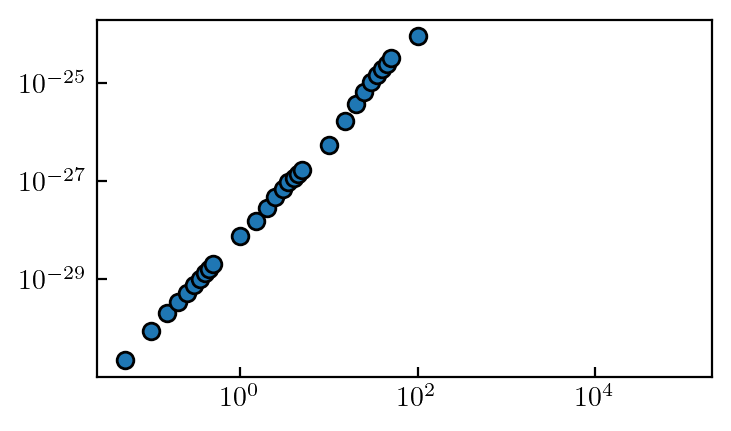

In [13]:
plt.figure(figsize=( cm2inch(6*1.68),cm2inch(6)))

plt.loglog(tt * 0.05, c4, "o")

In [14]:
def Dx_z(z):
    r = 1.5e-6
    result = (
        1
        - 9 / 16 * (r / (z + r))
        + 1 / 8 * (r / (z + r)) ** 3
        - 45 / 256 * (r / (z + r)) ** 4
        - 1 / 16 * (r / (z + r)) ** 5
    )
    return result * D0


def P_b(z, B, ld, lb):
    lb = lb * 1e-9
    ld = ld * 1e-9
    z = z
    P_b = np.exp(-B * np.exp(-z / (ld)) - z / lb)
    P_b[z < 0] = 0

    # Normalization of P_b

    A = trapz(P_b, z)
    P_b = P_b / A

    return P_b

In [15]:
B = 4.8
ld = 21
lb = 530
D0 = 4e-21 / (6 * np.pi * 0.001 * 1.5e-6)
z = np.linspace(1e-9, 5e-6, 1000000)
D_moy = Dx_z(z) * P_b(z, B, ld, lb)
D_moy = np.trapz(D_moy, z)

D_moy2 = Dx_z(z) ** 2 * P_b(z, B, ld, lb)
D_moy2 = np.trapz(D_moy2, z)

In [16]:
lb

530

In [17]:
(D_moy2 - D_moy ** 2) / 2

1.2595873833284212e-28

In [18]:
def short_c4(t):
    return t ** 2 / 2 * (D_moy2 - D_moy ** 2)


tth = np.linspace(1e-2, 1e3, 10)

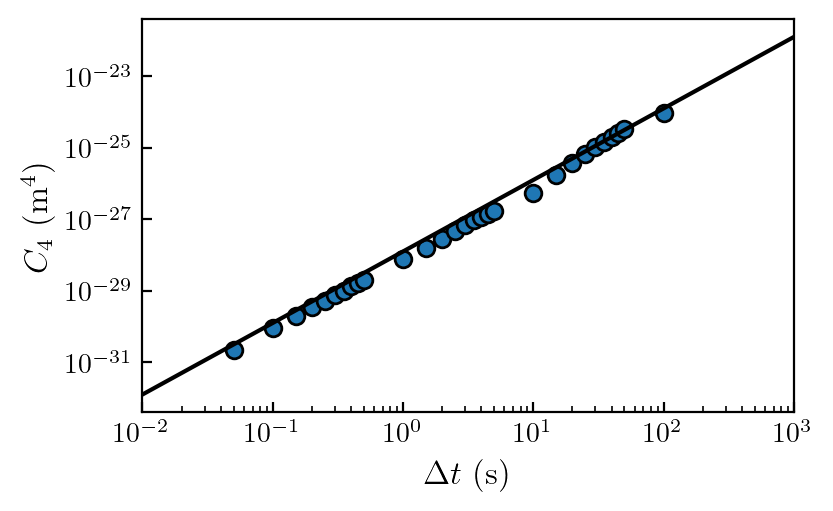

In [21]:
plt.figure(figsize=( cm2inch(6*1.68),cm2inch(6)))

plt.loglog(tt * 0.05, c4, "o")
plt.plot(tth, short_c4(tth), color="k")
plt.xlim(1e-2, 1e3)

plt.ylabel("$C_4$ (m$^4$)")
plt.xlabel("$\Delta t$ (s)")

plt.tight_layout(pad=0.01)
plt.savefig("simulatedc4.svg")

In [37]:
(D_moy2 - D_moy ** 2) / 2

1.2595873833284212e-28

In [85]:
raw_data = loadmat(
    "../../../chapter3/images/trajctory_analysis/fit_result_dur_27052020_n_r_fix_0p0513_wav_532_r_1p516_n_1.597.mat"
)["data"][:, 0:3]

In [86]:
x = raw_data[:, 1] * 0.0513 * 1e-6
y = raw_data[:, 0] * 0.0513 * 1e-6

In [129]:
def _C4(x, t):
    return (
        1
        / 24
        * (np.mean((x[:-t] - x[t:]) ** 4) - 3 * (np.mean((x[:-t] - x[t:]) ** 2)) ** 2)
    )


def C4(x, t):
    return np.array([_C4(x, i) for i in t])


tte = np.array(
    [
        *np.arange(1, 10, 1),
        *np.arange(10, 50, 10),
    ]
)

c4_exp = (C4(x, tte) + C4(y, tte)) / 2

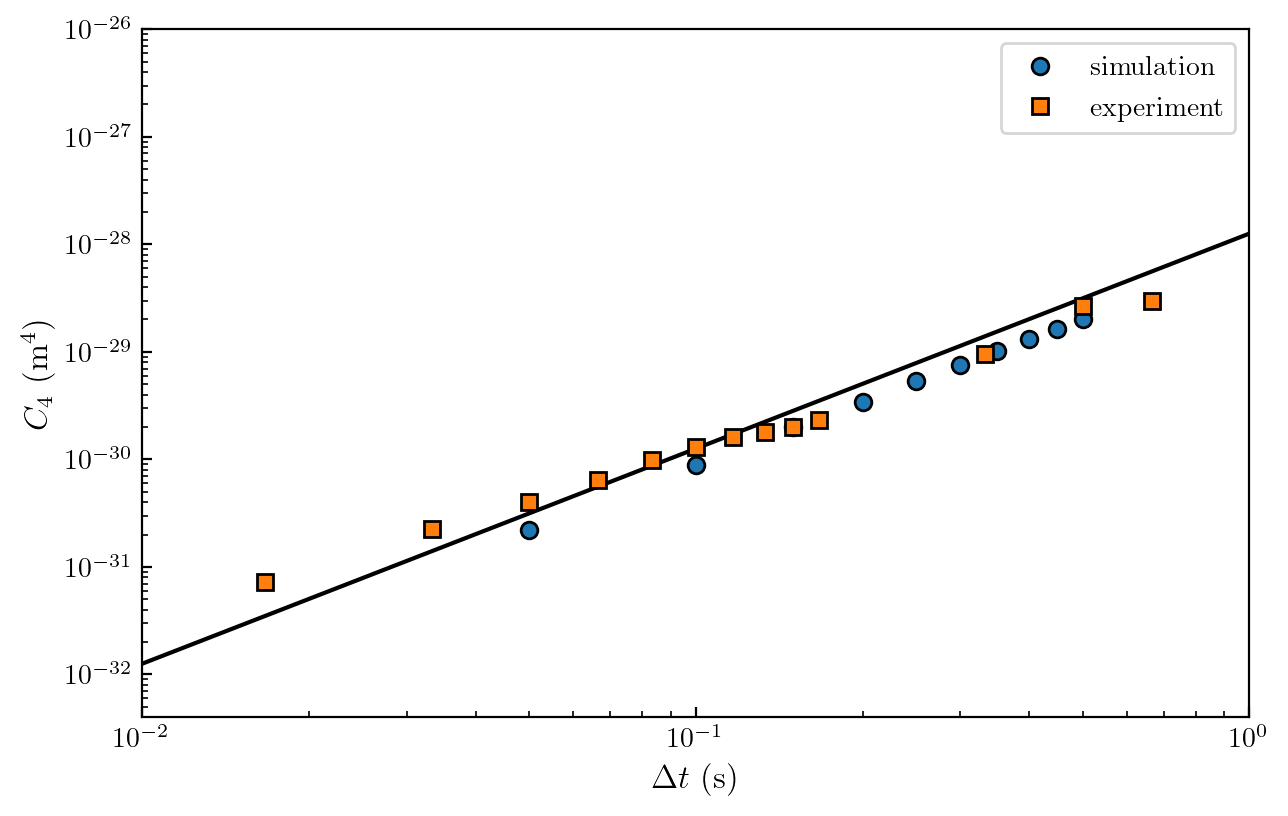

In [140]:
fig = plt.figure(figsize=(cm2inch(16), cm2inch(10)))

plt.loglog(tt[:10] * 0.05, c4[:10], "o", label="simulation")
plt.plot(tth, short_c4(tth), color="k")
plt.xlim(1e-2, 1e3)

plt.loglog(tte / 60, c4_exp, "s", label="experiment")
# plt.plot(tte / 60, c4_exp_y, "o")


plt.ylabel("$C_4$ (m$^4$)")
plt.xlabel("$\Delta t$ (s)")

plt.xlim(1e-2, 1)
plt.ylim(None, 1e-26)
plt.legend()
plt.tight_layout(pad=0.2)

plt.savefig("c4_exp.pdf")

In [141]:
4 * (20e-9) ** 4

6.4e-31

In [59]:
c4_exp

array([1.51483644e-31, 1.19547282e-30, 3.32738553e-30, 6.49624608e-30,
       1.07469236e-29, 1.54965595e-29, 2.07222669e-29, 2.74085043e-29,
       3.43394228e-29, 4.09296776e-29, 4.72647794e-29, 5.54688352e-29,
       6.42170307e-29, 7.52090378e-29, 8.74336423e-29, 9.74026501e-29,
       1.08318833e-28, 1.19234950e-28, 1.31878240e-28, 1.44558355e-28,
       1.58879891e-28, 1.74086680e-28, 1.88895419e-28, 2.05949556e-28,
       2.25089215e-28, 2.44473380e-28, 2.64520384e-28, 2.81280410e-28,
       2.97032275e-28, 3.13596145e-28, 3.29706838e-28, 3.48245255e-28,
       3.70977184e-28, 3.93643724e-28, 4.15498253e-28, 4.36774181e-28,
       4.59057731e-28, 4.83910138e-28, 5.11988944e-28, 5.40786143e-28,
       5.70301432e-28, 6.04878406e-28, 6.37451677e-28, 6.73865653e-28,
       7.11590675e-28, 7.46522468e-28, 7.75389536e-28, 8.00410737e-28,
       8.17768157e-28, 8.36078341e-28, 8.59481240e-28, 8.71076804e-28,
       8.89849902e-28, 9.12093480e-28, 9.36631969e-28, 9.65621757e-28,
      

In [70]:
c4_exp

array([1.47348894e-31, 5.59570576e-31, 1.17194569e-30, 2.04463718e-30,
       3.26404008e-30, 4.68713467e-30, 6.33071298e-30, 8.18857762e-30,
       1.03985701e-29, 1.27467990e-29, 4.48672622e-29, 9.68932338e-29,
       1.63565590e-28, 2.56396631e-28, 3.52486131e-28, 4.38070541e-28,
       5.38568972e-28, 6.49924735e-28])